In [2]:
!pip install -U ridge-map

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for SRTM.py: filename=SRTM.py-0.3.7-py3-none-any.whl size=105846 sha256=4a3531698a09b197ebc084d9f1930e7e2be29b5acb6ffcac8841c2c5a639c0de
  Stored in directory: /root/.cache/pip/wheels/d5/ad/29/2ba12215172525f9e549fb7e548573776f4c29dd450e46ef50
Successfully built SRTM.py


In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ridge_map import RidgeMap, FontManager

Benasque Aneto

In [18]:
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    print(fm.FontProperties(fname=font).get_name())

Liberation Serif
Liberation Mono
Liberation Sans Narrow
Liberation Sans Narrow
Liberation Sans
Liberation Serif
Liberation Sans Narrow
Liberation Sans Narrow
Liberation Mono
Humor Sans
Liberation Sans
Liberation Mono
Liberation Serif
Liberation Sans
Liberation Serif
Liberation Mono
Liberation Sans


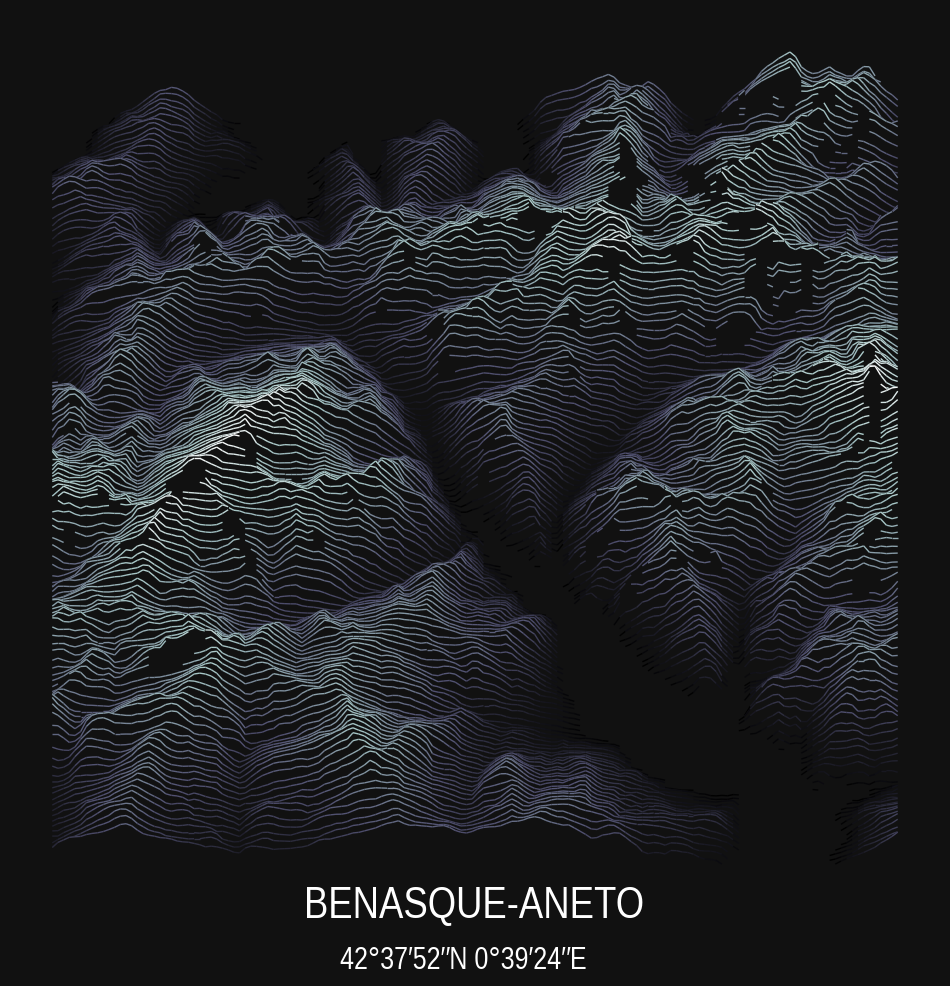

In [29]:
tr = [42.74351936098472, 0.42594910829930654][::-1]
bl = [42.55392702062676, 0.7026687986945603][::-1]

#peaks = {"name" : ["Aneto", "Punto de Astorg"] ,
#        "lat": [42.63092286672497, 42.63946335989189],
#         "lon": [0.6568957864080858, 0.6426807338194749]
#        }
#peaks = pd.DataFrame.from_dict(peaks)

bgcolor = "#111111"
font = FontManager('https://github.com/google/fonts/blob/1ade59d088239e9aa38f7678e3a5efd9e4d5c70d/ofl/matangi/Matangi%5Bwght%5D.ttf')

fig,ax = plt.subplots(figsize=(12, 12))
fig.set_facecolor(bgcolor)

rm = RidgeMap(bl + tr, font=font.prop)
values = rm.get_elevation_data(num_lines=150, elevation_pts=150)
ridges = rm.plot_map(values=rm.preprocess(values=values, vertical_ratio=150, water_ntile=10,
                                 lake_flatness=2),
            kind='elevation',
            label=None,
            line_color = plt.get_cmap('bone'),
            background_color = bgcolor,
            linewidth=1,
            ax=ax
           )
#for i in range(len(peaks)):
#    coords = ((peaks["lon"][i] - rm.longs[0])/(rm.longs[1] - rm.longs[0]),
#              (peaks["lat"][i] - rm.lats[0])/(rm.lats[1] - rm.lats[0]))
#    ridges.plot(*coords, 'o',
#            color='white',
#            transform=ridges.transAxes,
#            ms=6,
#            zorder=5000)

plt.figtext(0.37,0.15, "Benasque-Aneto".upper(), va='top', ha="left", fontsize=32, color="white", fontname='Liberation Sans Narrow',
            weight='ultralight')
plt.figtext(0.40,0.10, "42°37′52″N 0°39′24″E ".upper(), va='top', ha="left", fontsize=22, color="white", fontname='Liberation Sans Narrow',
            weight='light')


plt.savefig("aneto_v0.png", bbox_inches='tight',  transparent=False, pad_inches=0)
plt.savefig("aneto_v0.svg", bbox_inches='tight', dpi=300, transparent=False, pad_inches=0)

plt.show()